In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/ext_navish_iitkgp_gmail_com/ganRegression/')

#### Hexagonal Level Dataset

In [2]:
import numpy as np
import os
from functools import partial
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import sys
import pickle
from pathlib import Path
import pandas as pd


# hex2vec
HOME = os.environ["HOME"]

sys.path.insert(0, f"{HOME}/hex2vec")

# add codebase
sys.path.insert(0, f"/gcsmount-notebook/codebase")

from src.data.make_dataset import h3_to_polygon
import urban_tools.constants as uc
from urban_tools.hex_pipeline import RouteHexHandler, TestTrainManager
from urban_tools.pipelines import route_hex_pipeline


## Read in the Delivery DataFrame
# p = Path("/gcsmount-research-data-staging/osmnx-cities/hexed-routes/11.23.22/hh.pkl")
# p = Path("/gcsmount-research-data-staging/osmnx-cities/hexed-routes/11.29.22-No-Outlier-Tags-Boston/hh.pkl")
p = Path("/gcsmount-research-data-staging/osmnx-cities/hexed-routes/11.29.22-All-Tags-No-Tukey/hh.pkl")
hh = RouteHexHandler.from_pickle(p)


hh.df = hh.df.loc[hh.df.city.str.contains("Boston")]

# ---------------------------------------
percentage = 0.01

drop_cols = pd.Index([])
for _hh in [hh]:
    assert _hh.df["city"].unique().shape[0] == 1
    h3_df = _hh.df.groupby('h3')[_hh.all_tags].first()
    percent_occurance = (h3_df > 0).sum() / h3_df.shape[0]
    drop_cols = drop_cols.union(percent_occurance[percent_occurance < percentage].index)
hh.drop_cols(drop_cols)

# embedding_df = pd.read_pickle("/gcsmount-research-data-staging/osmnx-cities/hexed-complete/Boston, MA/boston_embedding.pkl")

### Remove Super Tags
# hh.drop_super_tags()
### Remove Sub Tags
# hh = hh.drop_sub_tags()
### Filter for only H3 with > X Data Points

hh = hh.filter_hex_occurance(20)
## Drop Unecessary Columns
hh.other_tags
### Drop Chicago
# print(tagged_df.shape[0].compute(), tagged_df.shape[1])
# tagged_df = tagged_df.loc[~tagged_df["city"].str.contains("Chicago")]
# filter for only Boston
hh.df = hh.df.loc[hh.df.city.str.contains("Boston")]
hh.drop_zero_tags()
# print(tagged_df.shape[0].compute(), tagged_df.shape[1])

## Data Preprocessing: Scaling and Splitting into train test


# create a grouped dataframe
tagged_df = hh.df.groupby("h3").agg({
    "planned_service_time_log": "mean",
    **{
        tag: "first"
        for tag in hh.all_tags
    }
})


from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

tt = TestTrainManager(
    hh.df,  # pass in the ungrouped dataframe aka raw
    x_col=hh.all_tags, 
    y_col=["planned_service_time_log"],
    # scaler=RobustScaler,
    scaler=StandardScaler,
    # scaler=MinMaxScaler,
    aggregate=True, # tell the manager to do the aggregation internally
    add_variance=True, # tell the manager to add the variance
)

tt.split_test_train()
tt.scale_test_train()
tt.build_test_df()

print(f'Training Data shape is {tt.X_train.shape}')
print(f'testing Data shape is {tt.X_test.shape}')

Aggregating Data
Training Data shape is (957, 134)
testing Data shape is (240, 134)


In [3]:
hh.print_history()

read_cities(*(PosixPath('/gcsmount-research-data-staging/osmnx-cities/hexed-complete'),), **{'cities': ['Boston, USA', 'Austin, USA', 'Seattle, USA', 'Los Angeles, USA'], 'add_city_col': True})
create_super_tags(*(), **{})
add_new_special_tag(*('building.area.ratio',), **{})
drop_zero_building_area(*(), **{})
add_new_special_tag(*('building.area.average',), **{})
add_new_special_tag(*('parking.area.ratio',), **{})
add_new_special_tag(*('parking.area.average',), **{})
append_route_df(*(), **{'route_file': PosixPath('/gcsmount-research-data-staging/almrrc2021-raw/data/almrrc2021-data-training/model_build_inputs/route_df_merged_augmented.parquet'), 'grouped': False, 'tukey_fences': False})
open_route_df(*(PosixPath('/gcsmount-research-data-staging/almrrc2021-raw/data/almrrc2021-data-training/model_build_inputs/route_df_merged_augmented.parquet'), False, False), **{})
filter_hex_occurance(*(), **{'min': 10})
drop_zero_tags(*(), **{})
drop_special_tags(*({},), **{})
filter_hex_occurance(*(2

<AxesSubplot: >

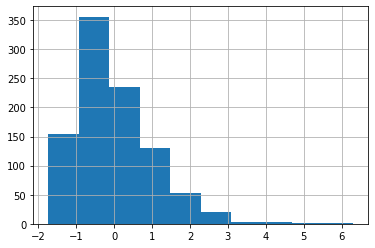

In [4]:
tt.X_train.building.hist()

#### Delievery Level Dataset

In [5]:
# import os
# import sys
# import pickle
# from pathlib import Path
# import torch; torch.manual_seed(0)
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.utils
# import torch.distributions
# import torchvision
# from torchvision import datasets, transforms
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

# from functools import partial
# import seaborn as sns
# import gc
# from numpy.random import binomial
# from numpy.random import normal

# import pandas as pd
# import seaborn as sns

# # %reset -s -f
# import os
# from functools import partial
# import logging

# # hex2vec
# HOME = os.environ["HOME"]

# sys.path.insert(0, f"{HOME}/hex2vec")

# # add codebase
# sys.path.insert(0, f"/gcsmount-notebook/codebase")

# from src.data.make_dataset import h3_to_polygon
# import urban_tools.constants as uc
# from urban_tools.hex_pipeline import RouteHexHandler, TestTrainManager
# from urban_tools.pipelines import route_hex_pipeline

# p = Path("/gcsmount-research-data-staging/osmnx-cities/hexed-routes/debug-multi-synthetic-tags/hh.pkl")
# hh = RouteHexHandler.from_pickle(p)
# # embedding_df = pd.read_pickle("/gcsmount-research-data-staging/osmnx-cities/hexed-complete/Boston, MA/boston_embedding.pkl")

# ### Filter for only H3 with > X Data Points
# hh = hh.filter_hex_occurance(20)
# ## Drop Unecessary Columns
# hh.other_tags

# ## Data Preprocessing: Scaling and Splitting into train test

# #### Create the Test-Train Manager
# # filter for only Boston
# from sklearn.preprocessing import RobustScaler
# hh.df = hh.df.loc[hh.df.city.str.contains("Boston")]
# tt = TestTrainManager(
#         hh.df,
#         scaler=RobustScaler,
#         x_col=hh.all_tags,
#         y_col=hh.df.columns.intersection(["planned_service_time_log"]),
#     )

# tt.split_test_train(random_seed=12323)
# tt.scale_test_train()
# tt.build_test_df()
# train = pd.concat([tt.X_train, tt.Y_train], axis=1, copy=True)
# test = pd.concat([tt.X_test, tt.Y_test.loc, tt.Y_test.scale], axis=1, copy=True)

# print(f'Training Data shape is {tt.X_train.shape}')
# print(f'testing Data shape is {tt.X_test.shape}')

# del hh
# gc.collect()

# # convert a pandas dataframe to a pytorch dataset
# class PandasDataset(torch.utils.data.Dataset):
#     def __init__(self, x_df, y_df):
#         self._x_df = x_df.values.astype(np.float32)
#         self._y_df = y_df.values.astype(np.float32).ravel()

#     def __len__(self):
#         return len(self._x_df)

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()
#         return self._x_df[idx], self._y_df[idx]

In [6]:
X_train, y_train, X_test, y_test = tt.X_train.values, tt.Y_train.loc.values.ravel(), tt.X_test.values, tt.Y_test.loc.values

### 2-PCA: Let's try to understand the data itself by projecting it onto a lower dimensional space
* But first let's see the distribution of log service times

/opt/conda/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


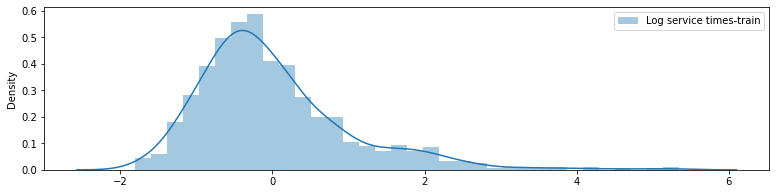

In [7]:
fig, ax = plt.subplots(figsize=(13, 3))

# TR the count is computed automatically
g = sns.distplot(x=y_train, ax=ax, label='Log service times-train')
plt.legend()

plt.show()

In [8]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
import statistics as stat
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
%matplotlib inline

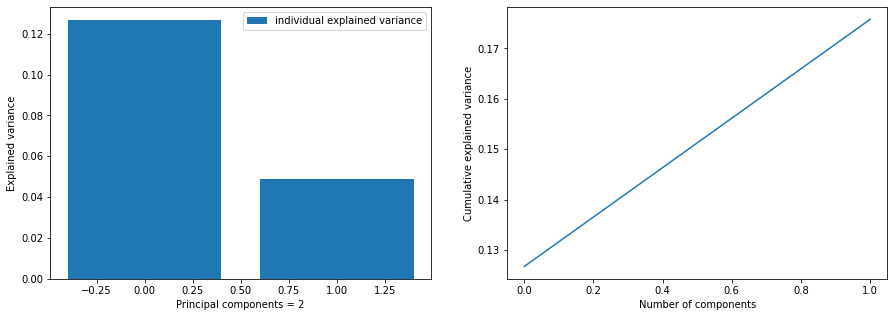

In [9]:
# n_components = X_train.shape[1]
n_components = 2
pca = PCA(n_components=n_components)
# pca = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.1)
X_pca = pca.fit_transform(X_train)
explained_variance=pca.explained_variance_ratio_

# explained_variance = np.var(X_pca, axis=0) / np.sum(np.var(X_pca, axis=0))

# create subplots for cumulative explained variance and individual explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot individual explained variance
ax1.bar(range(n_components), explained_variance, label='individual explained variance')
ax1.set_xlabel(f'Principal components = {n_components}')
ax1.set_ylabel('Explained variance')
ax1.legend()

# plot cumulative explained variance
ax2.plot(np.cumsum(explained_variance))
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Cumulative explained variance')

plt.show()


In [10]:
pca_df=pd.DataFrame(pca.fit_transform(X_train))
pca_df.columns=["pc1","pc2"]
pca_df["y"]= y_train

pca_df_test=pd.DataFrame(pca.transform(X_test))
pca_df_test.columns=["pc1","pc2"]
pca_df_test["y"]= y_test


pca_df.head()

,pc1,pc2,y
0,-1.943110,0.631550,-0.078256
1,-1.898859,0.659968,-0.058571
2,-2.092186,0.297476,-1.092269
3,-1.748749,0.065175,-0.314205
4,-0.546994,0.088593,-0.570463


/opt/conda/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


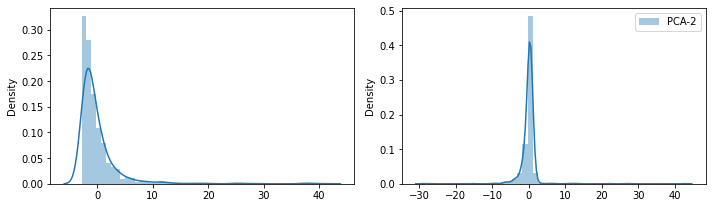

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# TR the count is computed automatically
sns.distplot(x=pca_df['pc1'], ax=axes[0], label='PCA-1')
sns.distplot(x=pca_df['pc2'], ax=axes[1], label='PCA-2')
plt.legend()

plt.tight_layout()
plt.show()

#### VAE for dimensionality reduction

In [12]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200

## Write a deep variational autoencoder

In [13]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 2*latent_dim)
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim),
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def forward(self, x):
        h = self.encoder(x)
        mu, logvar = torch.chunk(h, 2, dim=1)
        z = self.reparameterize(mu, logvar)
        return self.decoder(z), mu, logvar

In [14]:
# define the loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [15]:
# define the training function
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    return train_loss / len(train_loader.dataset)

#### Creating Pytorch Trainloader

In [16]:
# convert a pandas dataframe to a pytorch dataset
class PandasDataset(torch.utils.data.Dataset):
    def __init__(self, x_df, y_df):
        self._x_df = x_df.values.astype(np.float32)
        self._y_df = y_df.values.astype(np.float32).ravel()

    def __len__(self):
        return len(self._x_df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        return self._x_df[idx], self._y_df[idx]

batch_size = 64 

train_loader = torch.utils.data.DataLoader(PandasDataset(tt.X_train, tt.Y_train.loc), batch_size=batch_size, shuffle=True, num_workers=8)
test_loader = torch.utils.data.DataLoader(PandasDataset(tt.X_test, tt.Y_test.loc), batch_size=batch_size, shuffle=True, num_workers=8)
# test_loader = torch.utils.data.DataLoader(PandasDataset(X_test, pd.concat([y_test.loc, y_test.scale], axis=1, copy=True)), batch_size=batch_size, shuffle=True, num_workers=2)

In [40]:
# define the model, optimizer, and start the training
model = VAE(input_dim=X_train.shape[1], latent_dim=50)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_loss = []
EPOCHS = 3000
# Training Loop
for epoch in range(1,  EPOCHS + 1):
    train_loss.append(train(model, train_loader, optimizer, epoch))   

Train Epoch: 1 [0/957 (0%)]	Loss: 95.073784
====> Epoch: 1 Average loss: 93.7374
Train Epoch: 2 [0/957 (0%)]	Loss: 92.069199
====> Epoch: 2 Average loss: 89.0398
Train Epoch: 3 [0/957 (0%)]	Loss: 82.903778
====> Epoch: 3 Average loss: 69.9038
Train Epoch: 4 [0/957 (0%)]	Loss: 46.317009
====> Epoch: 4 Average loss: 24.3560
Train Epoch: 5 [0/957 (0%)]	Loss: -7.764401
====> Epoch: 5 Average loss: -220.2740
Train Epoch: 6 [0/957 (0%)]	Loss: -462.835754
====> Epoch: 6 Average loss: -405.1408
Train Epoch: 7 [0/957 (0%)]	Loss: -526.578064
====> Epoch: 7 Average loss: -529.3894
Train Epoch: 8 [0/957 (0%)]	Loss: -445.326874
====> Epoch: 8 Average loss: -560.4806
Train Epoch: 9 [0/957 (0%)]	Loss: -554.180481
====> Epoch: 9 Average loss: -643.4935
Train Epoch: 10 [0/957 (0%)]	Loss: -652.305298
====> Epoch: 10 Average loss: -682.0253
Train Epoch: 11 [0/957 (0%)]	Loss: -705.084473
====> Epoch: 11 Average loss: -732.5114
Train Epoch: 12 [0/957 (0%)]	Loss: -624.954041
====> Epoch: 12 Average loss: -7

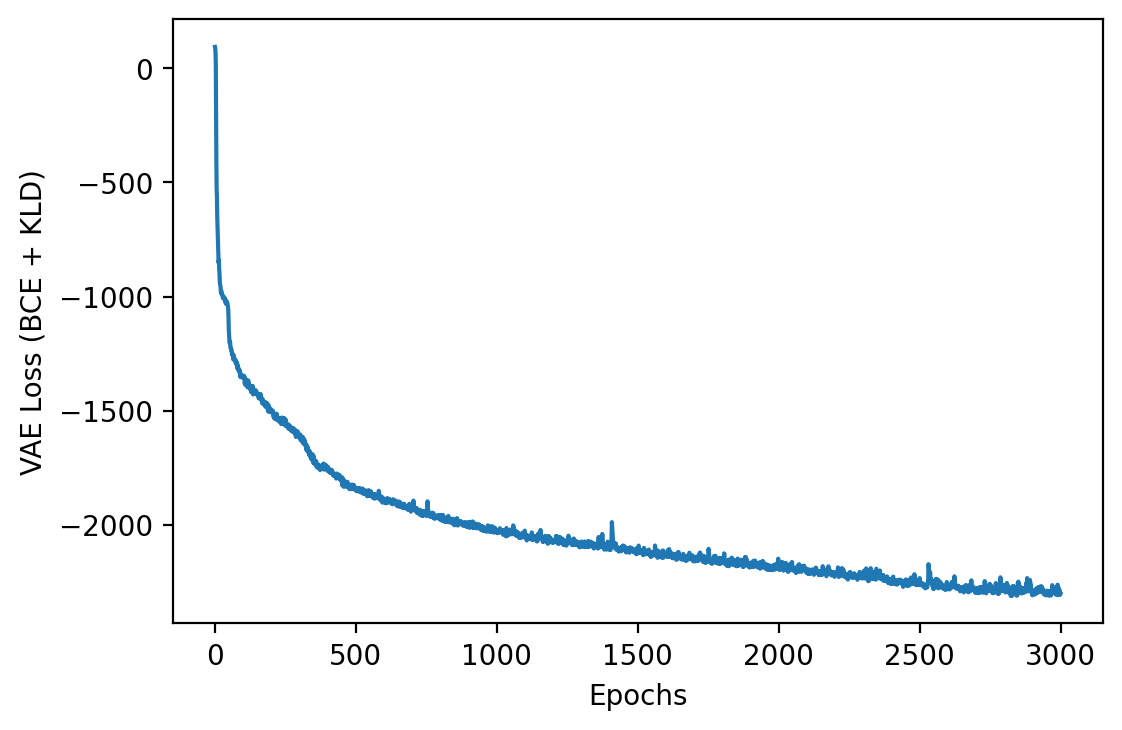

In [41]:
# plot training loss
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200
plt.plot(train_loss)
plt.xlabel('Epochs')
plt.ylabel('VAE Loss (BCE + KLD)')
plt.show()

### Retrieve the latent space

In [53]:
n_components = 50
with torch.no_grad():
    latent_train = np.zeros((X_train.shape[0], n_components))
    for batch_idx, (data, _) in enumerate(train_loader):
        recon_batch, mu, logvar = model(data)
        latent_train[batch_idx*batch_size:(batch_idx+1)*batch_size, :] = mu.numpy()

# # Plot the latent space
# plt.scatter(latent_train[:, 0], latent_train[:, 1], c=tt.Y_train.loc, s=10)
# plt.xlabel('Latent Variable 1')
# plt.ylabel('Latent Variable 2')
# plt.show()

### Plot the latent space with the test data

In [54]:
with torch.no_grad():
    latent_test = np.zeros((X_test.shape[0], n_components))
    for batch_idx, (data, _) in enumerate(test_loader):
        recon_batch, mu, logvar = model(data)
        latent_test[batch_idx*batch_size:(batch_idx+1)*batch_size, :] = mu.numpy()

# plt.scatter(latent_test[:, 0], latent_test[:, 1], c=tt.Y_test.loc, s=10)
# plt.xlabel('Latent Variable 1')
# plt.ylabel('Latent Variable 2') 
# plt.show()

In [45]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# # TR the count is computed automatically
# sns.distplot(x=latent_train[:, 0], ax=axes[0], label='Latent-1')
# axes[0].legend()
# sns.distplot(x=latent_train[:, 1], ax=axes[1], label='Latent-2')
# axes[1].legend()

# plt.tight_layout()
# plt.show()

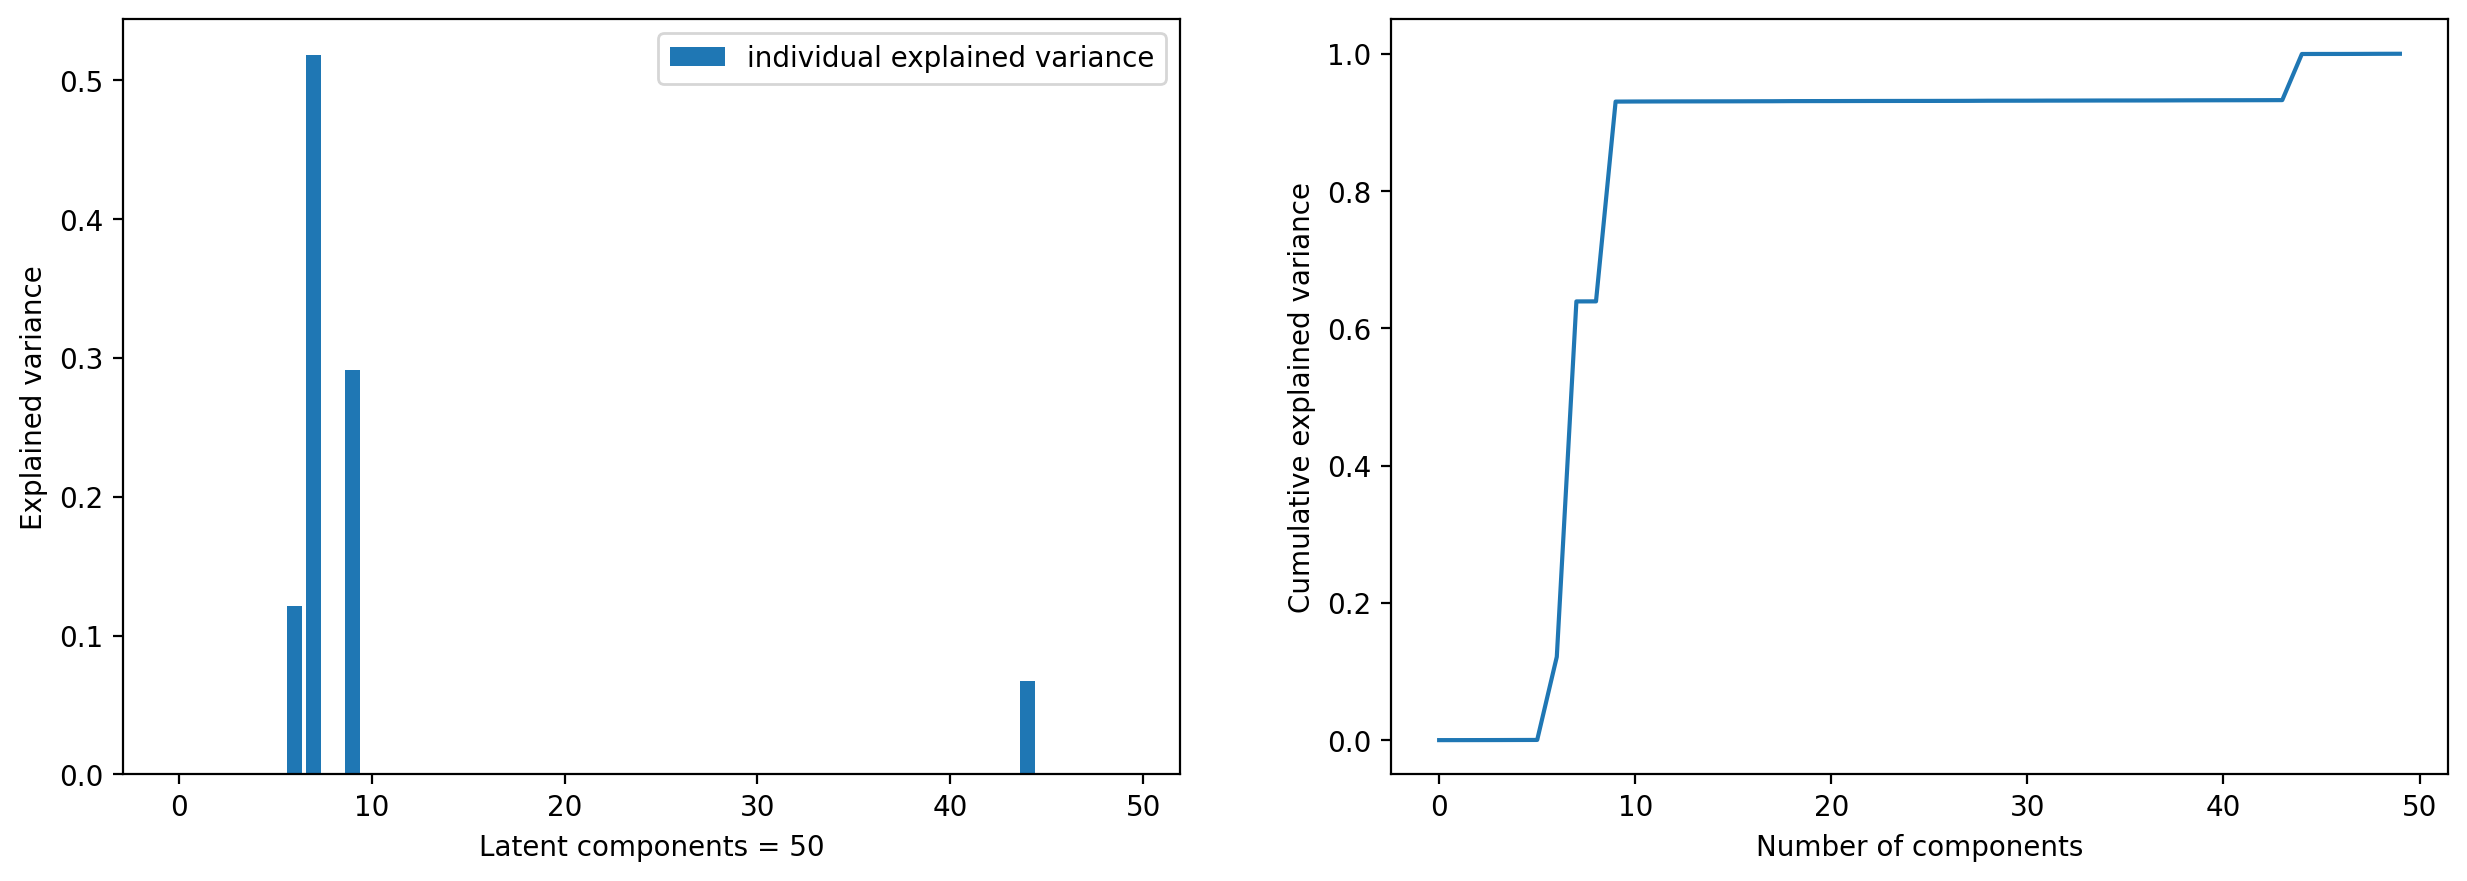

In [57]:
n_components = 50
explained_variance = np.var(latent_train, axis=0) / np.sum(np.var(latent_train, axis=0))

# create subplots for cumulative explained variance and individual explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# plot individual explained variance
ax1.bar(range(n_components), explained_variance, label='individual explained variance')
ax1.set_xlabel(f'Latent components = {n_components}')
ax1.set_ylabel('Explained variance')
ax1.legend()

# plot cumulative explained variance
ax2.plot(np.cumsum(explained_variance))
ax2.set_xlabel('Number of components')
ax2.set_ylabel('Cumulative explained variance')

plt.show()

## NGBoost

NGBRegressor on Latent: 
[iter 0] loss=1.4189 val_loss=0.0000 scale=1.0000 norm=1.0000
[iter 100] loss=1.2576 val_loss=0.0000 scale=1.0000 norm=0.8987
[iter 200] loss=1.1717 val_loss=0.0000 scale=2.0000 norm=1.7230
[iter 300] loss=1.1057 val_loss=0.0000 scale=1.0000 norm=0.8349
[iter 400] loss=1.0494 val_loss=0.0000 scale=1.0000 norm=0.8107
[iter 500] loss=0.9995 val_loss=0.0000 scale=1.0000 norm=0.7897
[iter 600] loss=0.9537 val_loss=0.0000 scale=1.0000 norm=0.7699
[iter 700] loss=0.9118 val_loss=0.0000 scale=1.0000 norm=0.7522
[iter 800] loss=0.8663 val_loss=0.0000 scale=1.0000 norm=0.7321
[iter 900] loss=0.8237 val_loss=0.0000 scale=1.0000 norm=0.7150
[iter 1000] loss=0.7872 val_loss=0.0000 scale=1.0000 norm=0.7001
[iter 1100] loss=0.7568 val_loss=0.0000 scale=1.0000 norm=0.6886
[iter 1200] loss=0.7212 val_loss=0.0000 scale=0.5000 norm=0.3369
[iter 1300] loss=0.6885 val_loss=0.0000 scale=0.5000 norm=0.3306
[iter 1400] loss=0.6552 val_loss=0.0000 scale=1.0000 norm=0.6486
[iter 1500] 

Text(0, 0.5, 'Predicted')

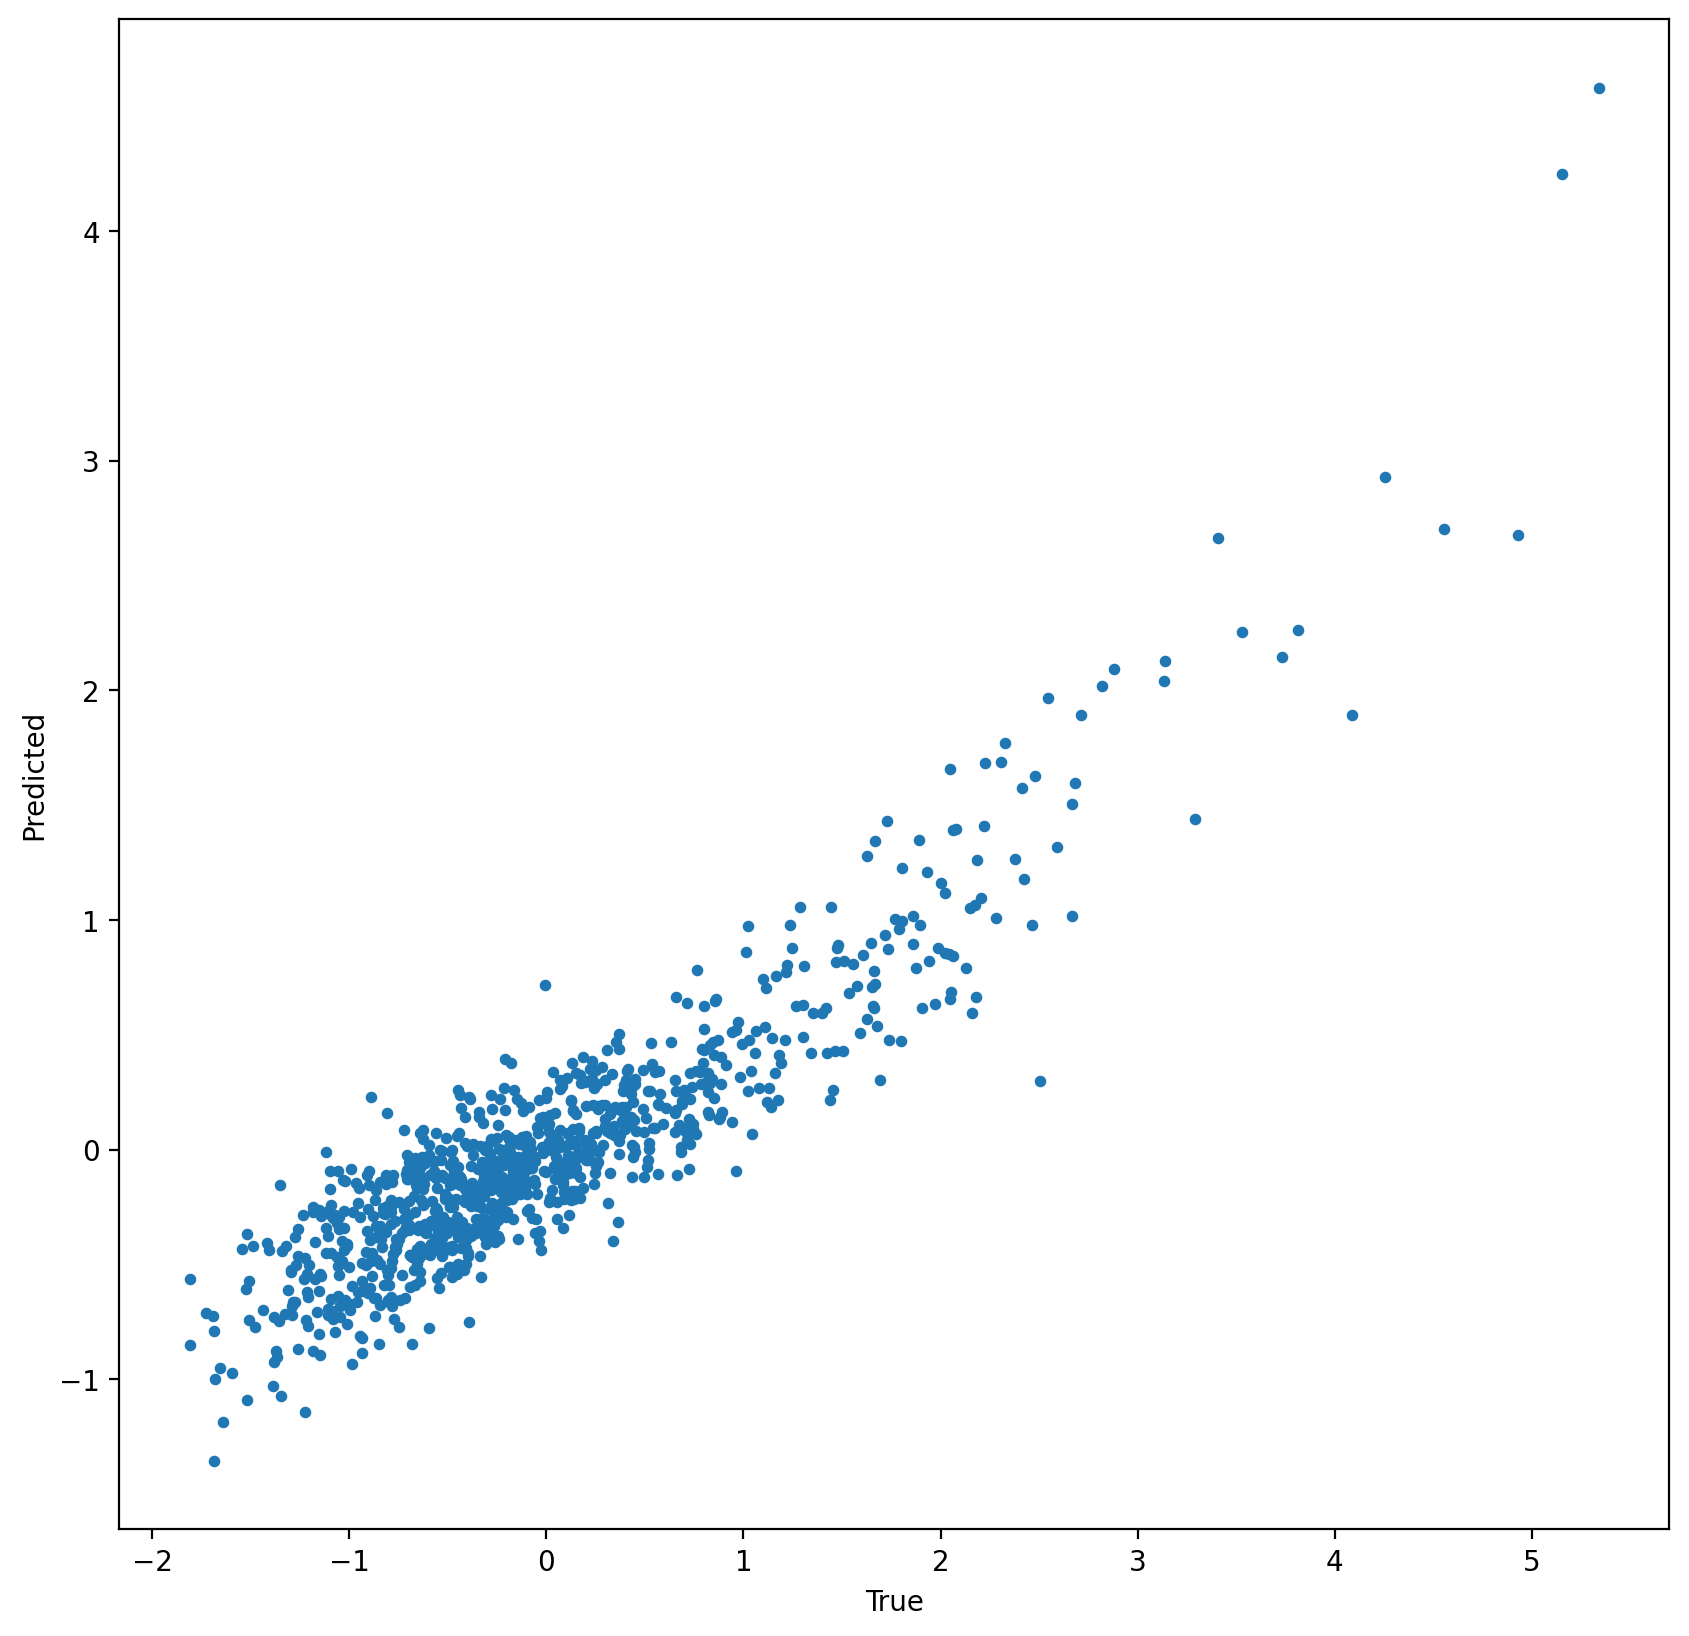

In [58]:
from ngboost import NGBRegressor
from ngboost.learners import default_tree_learner, default_linear_learner
from ngboost.scores import CRPS, MLE
from ngboost.distns import LogNormal, Normal
print("NGBRegressor on Latent: ")

ngb = NGBRegressor(
    n_estimators=2000,
    learning_rate=0.01,
    Dist=Normal,
    Base=default_tree_learner,
    natural_gradient=True,
    # minibatch_frac=1.0,
    Score=MLE,
    # minibatch_frac=0.5, 
    # col_sample=0.5
)

ngb.fit(latent_train, y_train, )  #X_val=tt.X_test, Y_val=tt.Y_test.loc.values.ravel(), early_stopping_rounds=200)

y_pred = ngb.predict(latent_train)

MAPE = metrics.mean_absolute_percentage_error(y_train, y_pred)
R2 = metrics.r2_score(y_train, y_pred)
MSE = metrics.mean_squared_error(y_train, y_pred, squared=True)
RMSE = metrics.mean_squared_error(y_train, y_pred, squared=False)


print(f"Train MAPE: { MAPE:.2f}, R2: {R2:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")
plt.figure(figsize=(10, 10))
plt.scatter(y_train, y_pred, s=10)
plt.xlabel('True')
plt.ylabel('Predicted')

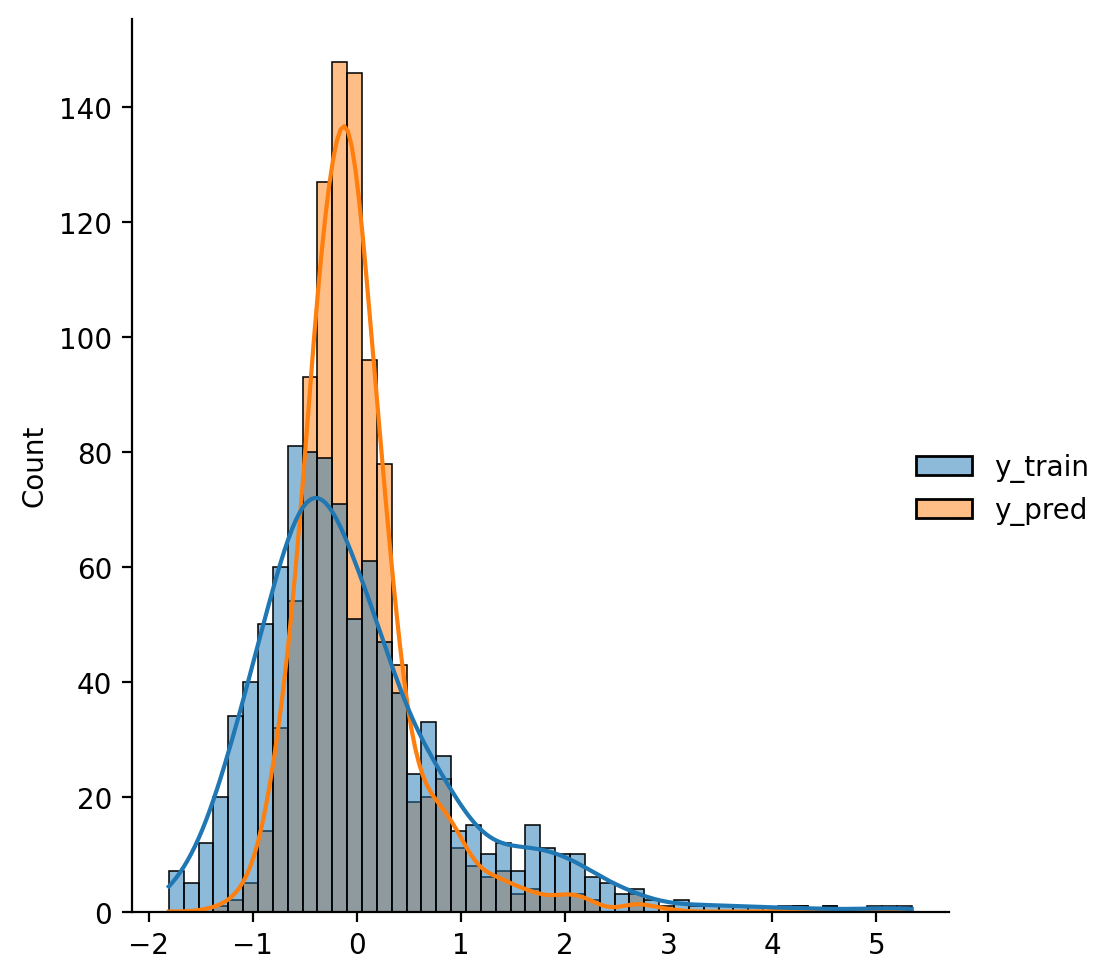

In [59]:
import seaborn as sns

y_pred = ngb.predict(latent_train)
std_train = ngb.pred_dist(latent_train).scale

# use seaborn to plot the distribution of the predictions, on the same plot
ax = sns.displot([y_train, y_pred], kde=True, bins=50)
# name the traces
ax._legend.texts[0].set_text("y_train")
ax._legend.texts[1].set_text("y_pred")


# sns.displot(y_pred, label="Fitted Values" , ax=ax, color='r')

Test MAPE: 2.42, R2: -0.11, MSE: 1.27, RMSE: 1.13


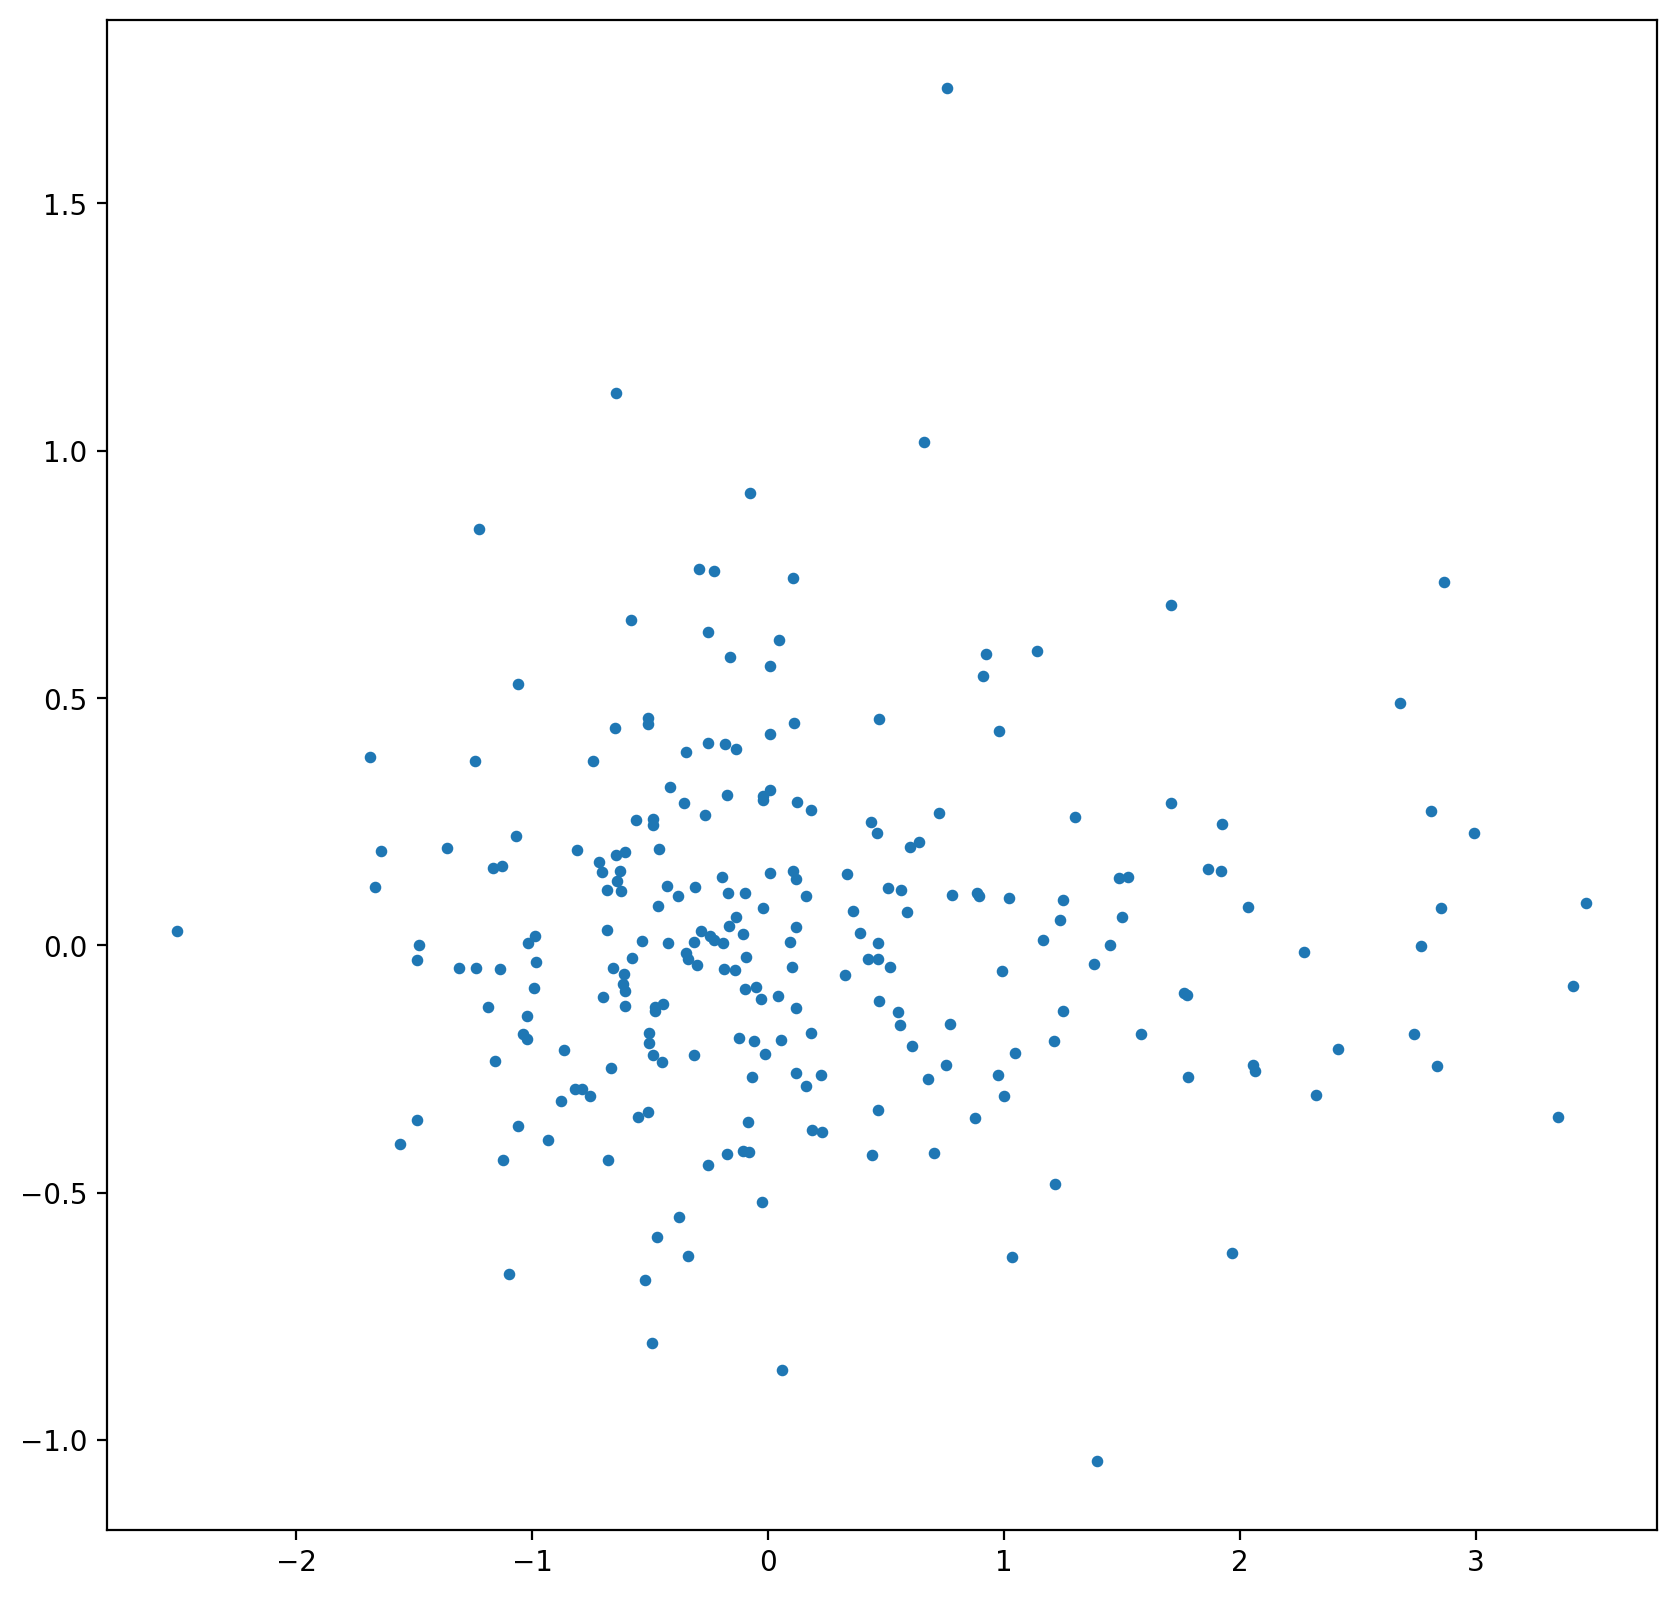

In [60]:
y_test = tt.Y_test.loc
y_pred = ngb.predict(latent_test)

MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
R2 = metrics.r2_score(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred, squared=True)
RMSE = metrics.mean_squared_error(y_test, y_pred, squared=False)

print(f"Test MAPE: {MAPE:.2f}, R2: {R2:.2f}, MSE: {MSE:.2f}, RMSE: {RMSE:.2f}")
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, s=10)

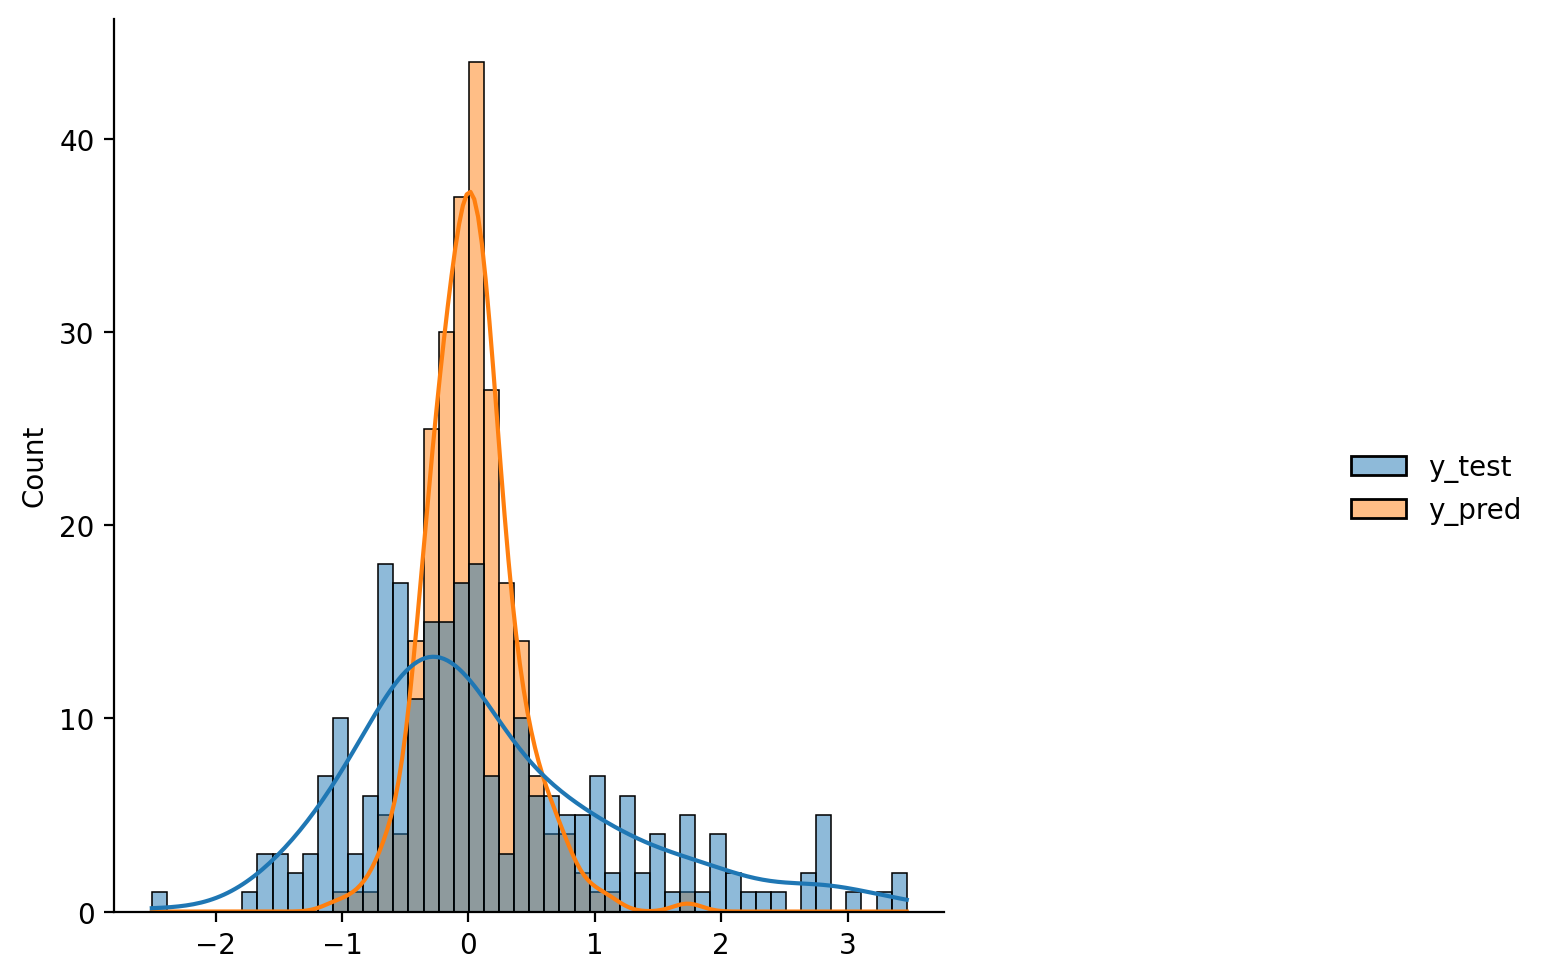

In [61]:
import seaborn as sns

y_test = tt.Y_test.loc
y_pred = ngb.predict(latent_test)
std_test = ngb.pred_dist(latent_test).scale

# use seaborn to plot the distribution of the predictions, on the same plot
ax = sns.displot([y_test, y_pred], kde=True, bins=50)
# name the traces
ax._legend.texts[0].set_text("y_test")
ax._legend.texts[1].set_text("y_pred")


# sns.displot(y_pred, label="Fitted Values" , ax=ax, color='r')

In [62]:
print('NGBOOST: Variance-predicitions')
print(f'Train MAPE: {metrics.mean_absolute_percentage_error(tt.Y_train.scale, std_train):.3f}, Train RMSE: {metrics.mean_squared_error(tt.Y_train.scale, std_train, squared=False):.3f}, Train R2: {metrics.r2_score(tt.Y_train.scale, std_train):.3f}')
print(f'Test MAPE: {metrics.mean_absolute_percentage_error(tt.Y_test.scale, std_test):.3f}, Test RMSE: {metrics.mean_squared_error(tt.Y_test.scale, std_test, squared=False):.3f}, Test R2: {metrics.r2_score(tt.Y_test.scale, std_test):.3f}')


NGBOOST: Variance-predicitions
Train MAPE: 3.232, Train RMSE: 1.077, Train R2: -0.160
Test MAPE: 8.989, Test RMSE: 1.032, Test R2: -0.115
